In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
import lmfit as lm
import lmfit.models as mod
from sklearn.linear_model import LinearRegression

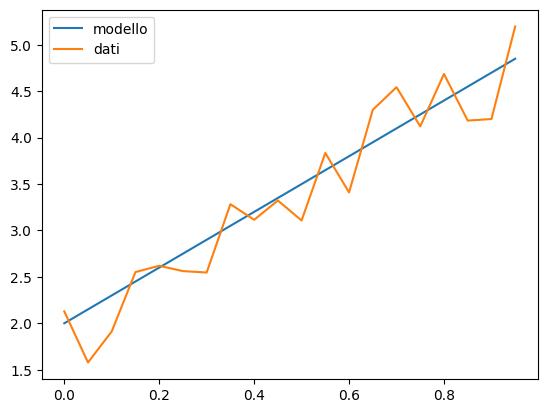

In [4]:
x=np.arange(0,1,0.05)
ym=3*x+2
y=ym+rnd.normal(scale=0.3, size=len(ym))
plt.plot(x,ym,label='modello')
plt.plot(x,y,label='dati')
plt.legend()

[3.21691514 1.83234617]


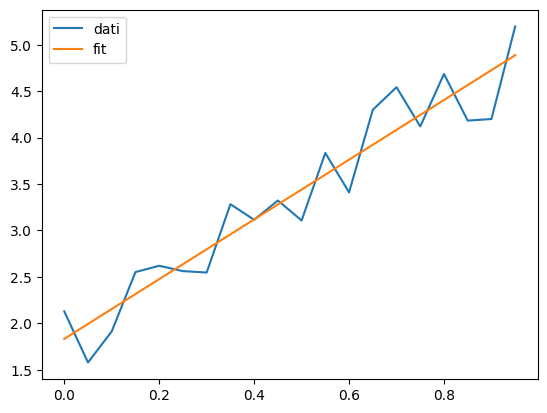

In [5]:
fit1=np.polyfit(x,y,1)
print(fit1)
polinomio=np.poly1d(fit1)
valori_fit=polinomio(x)
plt.plot(x,y, label='dati')
plt.plot(x,valori_fit, label='fit')
plt.legend()

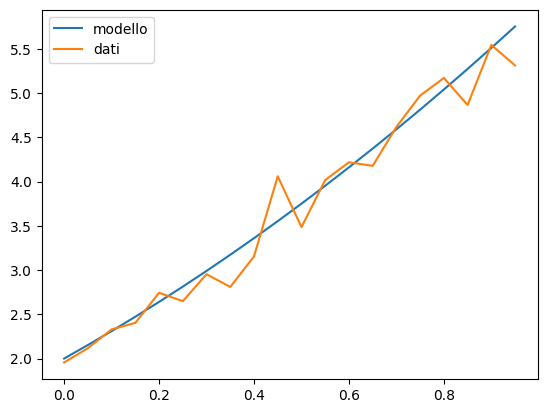

In [6]:
x=np.arange(0,1,0.05)
ym=x*x+3*x+2
y=ym+rnd.normal(scale=0.3, size=len(y))
plt.plot(x,ym,label='modello')
plt.plot(x,y,label='dati')
plt.legend()

[0.419108   3.45043231 1.90899195]


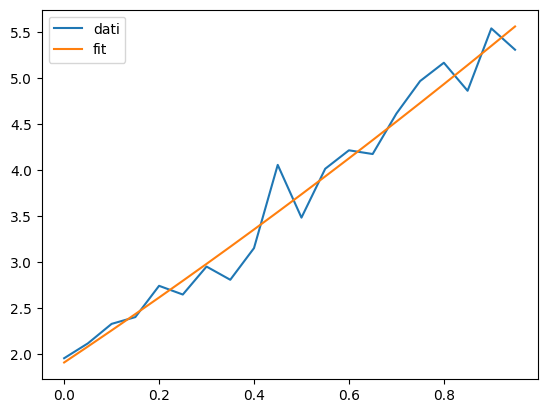

In [7]:
fit2=np.polyfit(x,y,2)
print(fit2)
polinomio=np.poly1d(fit2)
valori_fit=polinomio(x)
plt.plot(x,y, label='dati')
plt.plot(x,valori_fit, label='fit')
plt.legend()

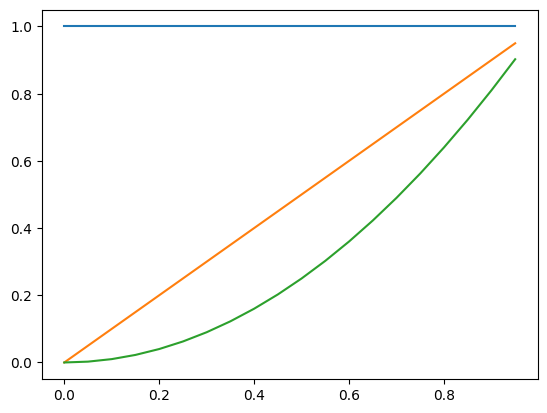

In [8]:
regr=np.zeros((len(x),2))
regr[:,0]=x
regr[:,1]=x*x
plt.plot(x,np.ones(len(x)))
plt.plot(x,regr)

In [9]:
mo = LinearRegression(fit_intercept=True)
mo.fit(regr, y)


LinearRegression()

In [10]:
print('intercetta',mo.intercept_)
print('coeff:', mo.coef_)

intercetta 1.9089919471837535
coeff: [3.45043231 0.419108  ]


**un modello più complesso**

$y=a+b x+c \cos(2 \pi x)$

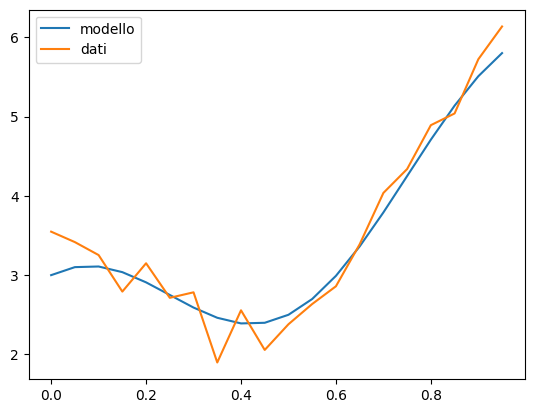

In [11]:
x=np.arange(0,1,0.05)
ym=3*x+2+np.cos(2*x*np.pi)
y=ym+rnd.normal(scale=0.3, size=len(y))
plt.plot(x,ym,label='modello')
plt.plot(x,y,label='dati')
plt.legend()

In [12]:
regr=np.zeros((len(x),3))
regr[:,0]=1
regr[:,1]=x
regr[:,2]=np.cos(2*x*np.pi)
mo = LinearRegression(fit_intercept=False)
mo.fit(regr, y)
print('coeff:', mo.coef_)

coeff: [2.04304013 3.02529936 1.20579496]


r^2 0.9678564165873927


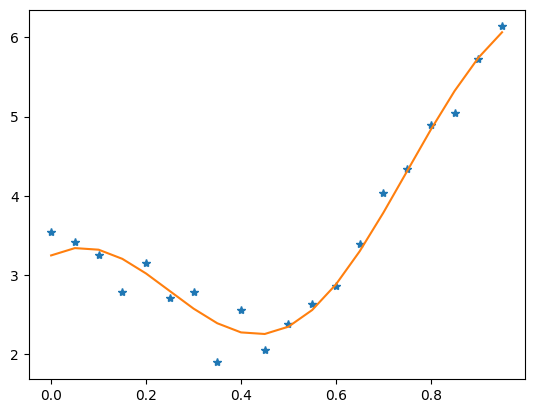

In [13]:
yf=mo.predict(regr)
plt.plot(x, y, '*')
plt.plot(x, yf)
print('r^2', mo.score(regr,y))

**non più lineare**

$y=a+b*e^{-x/c}$

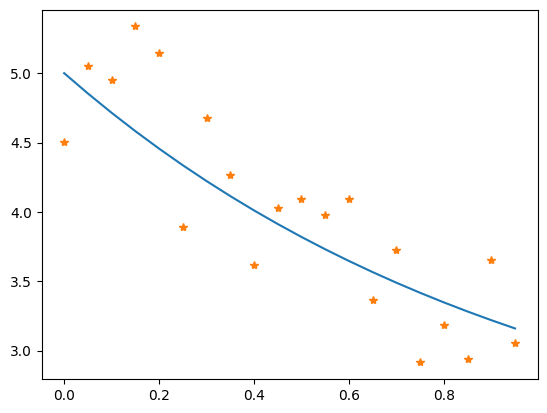

In [14]:
ym=2+3*np.exp(-x)
y=ym+3*np.exp(-x)*rnd.normal(scale=0.2, size=len(ym))
plt.plot(x,ym)
plt.plot(x,y,'*')

In [15]:
def expfun(x, a, b, c):
    return a+b*np.exp(-c*x)

expmodel = lm.Model(expfun)
result = expmodel.fit(y, x=x, a=1, b=1, c=1)

In [16]:
print(result.fit_report())

[[Model]]
    Model(expfun)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 171
    # data points      = 20
    # variables        = 3
    chi-square         = 2.67043899
    reduced chi-square = 0.15708465
    Akaike info crit   = -34.2697880
    Bayesian info crit = -31.2825912
    R-squared          = 0.74585913
[[Variables]]
    a: -13.9468409 +/- 163.950163 (1175.54%) (init = 1)
    b:  19.0207197 +/- 163.780819 (861.07%) (init = 1)
    c:  0.12083474 +/- 1.10254732 (912.44%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -1.000
    C(a, c) = 1.000
    C(b, c) = -1.000


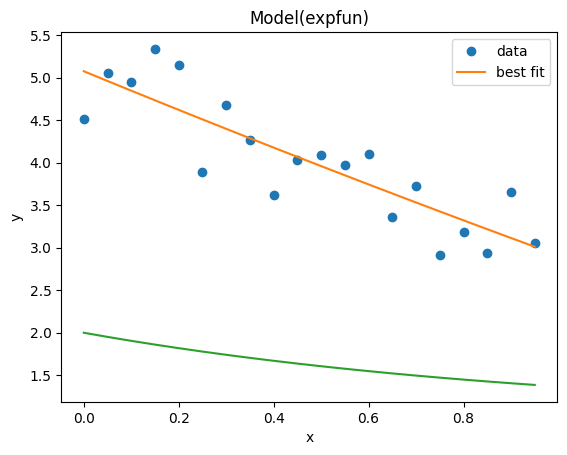

In [17]:
result.plot_fit()
plt.plot(x,result.init_fit)

In [ ]:
result.params

**esercizio**

ora implementate il vostro problema non lineare:
- elaborate un modello, per esempio $y=a \cos(b+c*x)$
- traducetelo in una funzione
- create un set di dati (x,y)
- analizzate i dati e decidete il valore iniziale dei parametri
- create ed adattate il modello